## Tutorial Notebook for logplot module.
The logplot module is used for plotting well logs in a physically appealing way.

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Generate random well log data
- For our purpose, I assume a well with a total depth of 200m, with 8.5in hole size and with some washouts. Since I have only generated random numbers for each log with no dependence from one log to another, these numbers have no physical meaning whatsoever. **This is only for display purpose!**

In [2]:
# Choose a random name for the well. Maybe not so random ;)!
well_name = 'Akintola-FA-01'
np.random.seed(1234)
# Generate a depth index
depth = np.arange(0,201,1)

# Generate a caliper log. 
cal = np.empty(201)
cal.fill(8.5)
noise = np.random.normal(0, .1, cal.shape) # Add noise to caliper log
cal = cal + noise
washout = np.random.uniform(0, 1, size=cal[0:5].shape) # Add washout
cal[20:25] = cal[20:25] + washout
cal[70:75] = cal[70:75] + washout

# Generate a Gamma log
gam = np.random.randint(0, 150, size=201)

# Generate a Resistivity log
res = np.random.uniform(0.2, 200, size=(201,))

# Generate a Density log
den = np.random.uniform(0.95, 2.95, size=(201,))

# Generate a Neutron Porosity log
neu = np.random.uniform(-0.15, 0.45, size=(201,))

### Combine well logs into a dataframe

In [3]:
# Create empty dataframe to hold well logs
well_data = pd.DataFrame([])

# Assign log data to columns in well dataframe
well_data['DEPTH'] = depth
well_data['CALI'] = cal
well_data['GR'] = gam
well_data['RT'] = res
well_data['RHOB'] = den
well_data['NPHI'] = neu

# Display first 5 rows of dataframe
well_data.head()

,DEPTH,CALI,GR,RT,RHOB,NPHI
0,0,8.547144,2,72.167735,2.910654,0.111806
1,1,8.380902,35,42.317288,2.404075,0.152667
2,2,8.643271,46,92.899688,2.493826,0.309681
3,3,8.468735,38,180.200580,2.279375,0.285915
4,4,8.427941,58,58.405853,2.416415,0.346223


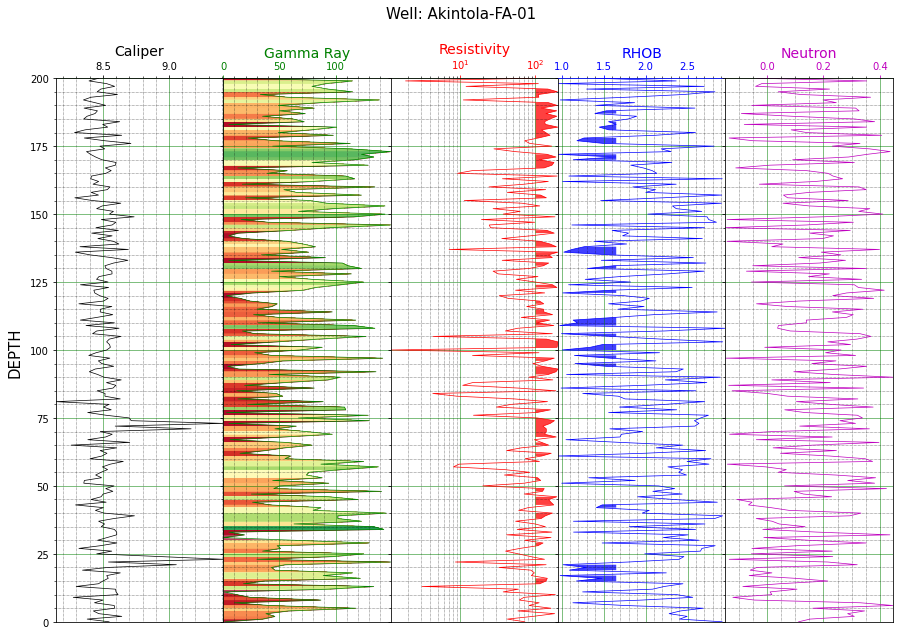

In [4]:
#import logplot module for well log visualization
from logplot.plot import LogPlot

log=["CALI",'GR','RT',"RHOB","NPHI"]
viz=LogPlot(dataset=well_data,depth=well_data['DEPTH'],
            name_of_well=well_name, depth_range =(0,200),logs=log)
viz.show()

### Using real well log data read through speui package. 

#### Plot from a csv file.

In [5]:
# Choose a random name for the well.
well_name = 'Stavanger-BB-01'

#import core module to read data file
from core.analysis_convert import Analysis
instance = Analysis()
well_data =instance.read_file(filename="data/wellx1.csv")
well_data = well_data.dropna()

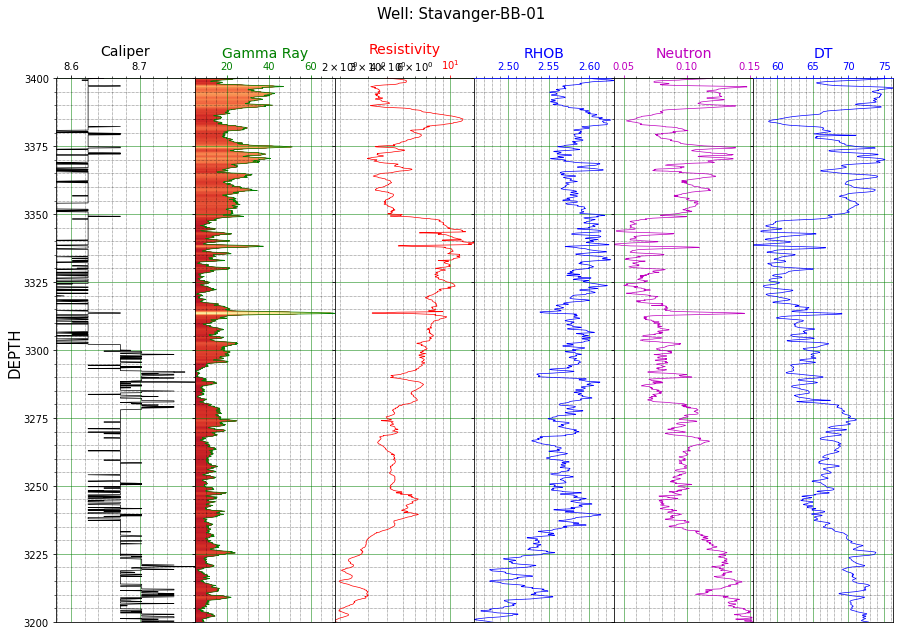

In [6]:
log=["CALI",'GR','RT',"RHOB","NPHI","DT"]
viz=LogPlot(dataset=well_data,depth=well_data['DEPTH'],
            name_of_well=well_name, depth_range =(3200,3400),logs=log)
viz.show()

#### Plot from a LAS file

In [7]:
data =instance.read_file(filename="data/15_9-F-11A.LAS")
data = data.dropna()

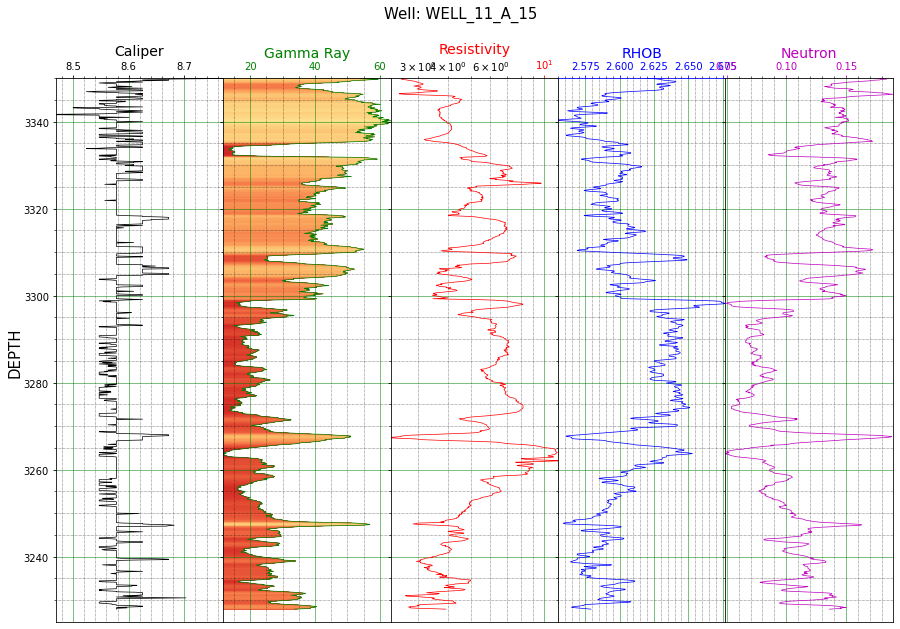

In [10]:
##Visualize the following logs: Caliper, Gamma-ray, Resistivity, Density, Neutron and Sonic-logs
log_to_show=["CALI",'GR','RT',"RHOB","NPHI"]
viz=LogPlot(dataset=data,depth=data['DEPTH'],
            name_of_well="WELL_11_A_15", depth_range =(3225,3350),logs=log_to_show)
viz.show()

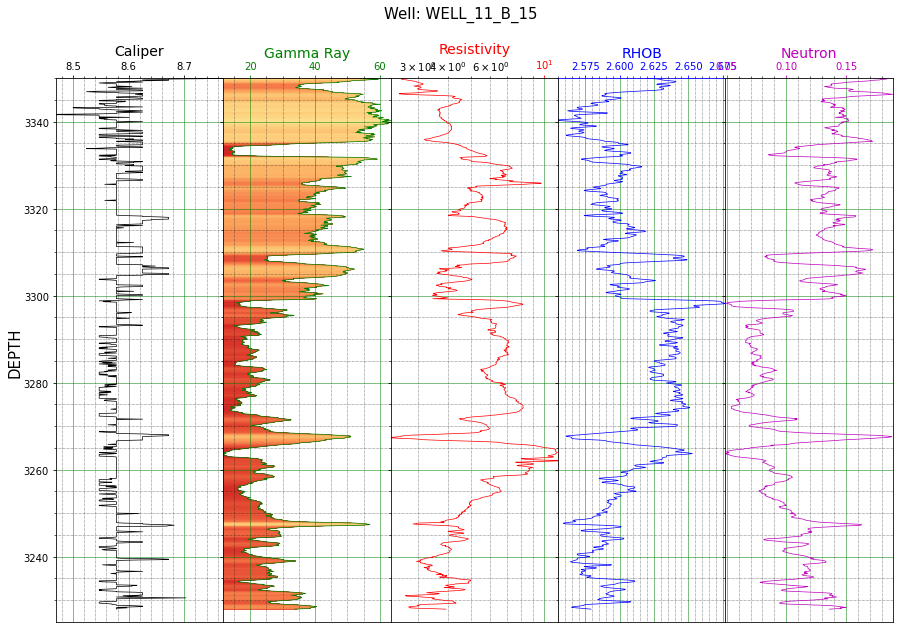

In [12]:
##Visualize the following logs: Caliper, Gamma-ray, Resistivity, Density, Neutron and Sonic-logs
data =instance.read_file(filename="data/15_9-F-11B.LAS")
data = data.dropna()
log_to_show=["CALI",'GR','RT',"RHOB","NPHI"]
viz=LogPlot(dataset=data,depth=data['DEPTH'],
            name_of_well="WELL_11_B_15", depth_range =(3225,3350),logs=log_to_show)
viz.show()